In [23]:
# Aca resolvemos una ODE con condición inicial
# Problema 1 del articulo
# Artificial Neural Networks for Solving Ordinary and Partial Differential Equations

In [24]:
# importamos los paquetes necesarios para el entrenamiento
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# definimos la red neuronal 
N = nn.Sequential(
    nn.Linear(1,50),
    nn.Sigmoid(),
    nn.Linear(50,1))

In [26]:
A = 1

In [27]:
Psi_estimate = lambda x:A+x*N(x) # Se define de esta manera tal que Psi(0) = A + 0*N(0) o si se quiere
# donde N es la red neural

\begin{align}
\frac{d}{dx} + \Psi \underbrace{(x+\frac{1+3x^2}{1+x+x^3})\Psi}_{f_1} - \underbrace{x^3+2x+x^2\frac{1+3x^2}{1+x+x^3}}_{f_2}= 0 
\end{align}

In [28]:
# ahora definimos la funcion f(.)
f1 = lambda x,Psi: x+(1+3*x**2)/(1+x+x**3)*Psi
f2 = lambda x: x**3+2*x+x**2*(1+3*x**2)/(1+x+x**3)

In [29]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_estimate(x)
    Psi_estimate_x = torch.autograd.grad(outputs,x, grad_outputs=torch.ones_like(outputs),create_graph=True)[0] # esta es la derivada de Psi con respecto a x, i.e., dPsi/dx
    return torch.mean((Psi_estimate_x+f1(x,outputs)-f2(x))**2)

In [30]:
optimizer = torch.optim.LBFGS(N.parameters())

In [31]:
x = torch.Tensor(np.linspace(0,1,100)[:,None])

In [32]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

for i in range(10):
    optimizer.step(closure)

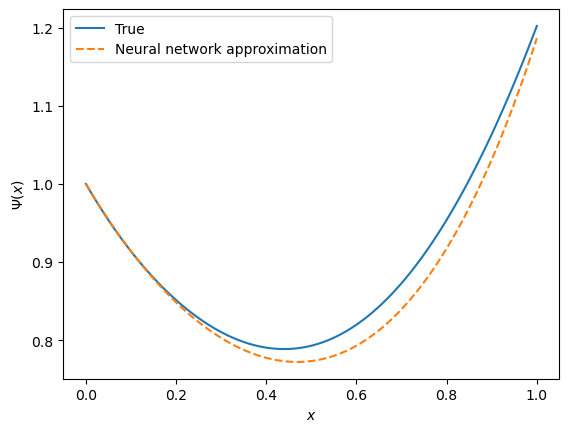

In [33]:
xx = np.linspace(0,1,100)[:,None]

with torch.no_grad():
    yy = Psi_estimate(torch.Tensor(xx)).numpy()
    
yt = (np.exp(-xx**2/2))/(1+xx+xx**3)+xx**2

fig, ax = plt.subplots(dpi=100)
ax.plot(xx,yt,label='True')
ax.plot(xx,yy,'--',label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$\Psi(x)$')
plt.legend(loc='best')